In [17]:
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow import keras

#keras model module
from keras.models import Sequential

#ceras core layers
from keras.layers import Dense, Dropout, Activation, Flatten

#cnn layars
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils

#Load image data from MNIST.
from keras.datasets import mnist

from keras.models import save_model, load_model;

#Matplot lib
from matplotlib import pyplot as plt;

import os.path as path;

In [18]:
#Formating strings
C_FMT_TRAIN_LEN = 'The lenght of the training set {} is {} images.';
C_FMT_TEST_LEN = 'The lenght of the test set {} is {} images';
C_FMT_DATA_DIMM = 'The dimensions of the data are : {}';


C_STR_MODEL_NAME = 'simple_numbers_1.h5'

In [19]:
#Shows subplot of images for given image list
def ShowGridPlotImgs(imageList, width=20, height=20, columns=10, rows=10):   
    fig=plt.figure(figsize=(8, 8))    
    for i in range(1, columns*rows + 1):        
        fig.add_subplot(rows, columns, i);
        plt.imshow(imageList[i]);
    plt.show();

In [20]:
def TrainSimpleNumbersModel(X_train, y_train, X_test, y_test, debug=True):  
    
    #Show info about traing and testing data
    if( debug ):
        print(C_FMT_TRAIN_LEN.format('X', len(X_train) ) );
        print(C_FMT_TRAIN_LEN.format('y', len(y_train) ) );
        print(C_FMT_TEST_LEN.format('X', len(X_test) ) );
        print(C_FMT_TEST_LEN.format('y', len(y_test) ) );
        print (C_FMT_DATA_DIMM.format(X_train.shape) );
        # (60000, 28, 28)

    print('First 100 train images');
    ShowGridPlotImgs(X_train);
    
    #Reshape input dataPython
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    
    #todo normalize the data
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    if( debug ):
        print('After normailzation');
        print(X_train[0])    
        print (y_train.shape)
        print (y_train[:10])

    # Convert 1-dimensional class arrays to 10-dimensional class matrices
    Y_train = np_utils.to_categorical(y_train, 10);
    Y_test = np_utils.to_categorical(y_test, 10);

    if( debug ): 
        print (Y_train.shape)
    
    #Declare Sequential modelPython
    model = Sequential()

    #CNN input layerPython
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first') )

    print (model.output_shape)
    # (None, 32, 26, 26)
    
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten());
    model.add(Dense(128, activation='relu'));
    model.add(Dropout(0.5));
    model.add(Dense(10, activation='softmax'));

    #Compile modelPython
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']);

    #Fit Keras modelPython
    model.fit(X_train, Y_train, batch_size=32, epochs=3, verbose=1);
    
    #Evalluate keras model
    score = model.evaluate(X_test, Y_test, verbose=0);
    
    if( debug ) : 
        print(score);       

    return model;

Loaded the model :simple_numbers_1.h5
The prediction is : 2


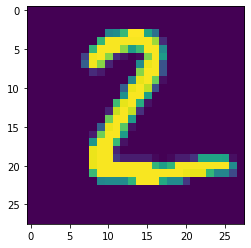

In [37]:
 # Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data();

#check if there is already traind model with the given name
if ( not path.exists(C_STR_MODEL_NAME) ) :
    answer = Input('There is no traind model. Do you want to train in now [y/n]?');    
    if( answer != 'y'):
        print ('Exiting now!');
        exit;  

    # Do the model training
    currModel = TrainSimpleNumbersModel( X_train, y_train, X_test, y_test)
    
    answer = input('Do you want to save the trained model now [y\n]?')
    
    if(anwser == 'y'):
        save_model(model, C_STR_MODEL_NAME);
else:
    currModel = load_model(C_STR_MODEL_NAME);
    print('Loaded the model :' + C_STR_MODEL_NAME);
    
    C_INT_IMG_INDEX = 1;
    
    plt.imshow(X_test[C_INT_IMG_INDEX]);    
    testSample = X_test.reshape(X_test.shape[0], 1, 28, 28)  
   
    
    prediction = currModel.predict(testSample);   
    
    print('The prediction is : {}'.format( np.argmax(prediction[C_INT_IMG_INDEX]) ) );
    #print('The prediction is : {}'.format(prediction) );